In [2]:
# 01 - Data Exploration & Cleaning
#Project: *Do Delays Damage Loyalty? — Olist dataset*

#Goals:
# - Preprocess raw Olist datasets
# - Create cleaned dataset for team
# - Basic exploration: review scores, delivery delays, first visualizations

In [14]:
# 01 - Data Exploration & Cleaning

# Project: *Do Delays Damage Loyalty? — Olist dataset*

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

print("Starting data exploration...")

Starting data exploration...


In [3]:
# =============================================================================
# LOAD EXISTING CLEAN DATASET
# =============================================================================

# Get paths
current_dir = os.getcwd()
print(f"Current directory: {current_dir}")

# Go up one level to project root if we're in notebooks/
if current_dir.endswith('notebooks'):
    project_root = os.path.dirname(current_dir)
else:
    project_root = current_dir

processed_file = os.path.join(project_root, "data", "processed", "clean_orders.csv")
figures_dir = os.path.join(project_root, "reports", "figures")

print(f"Looking for clean dataset at: {processed_file}")

# Create figures directory if it doesn't exist
os.makedirs(figures_dir, exist_ok=True)

Current directory: /Users/aaronshrestha/Documents/HCAI5DS02_ChiNova_final_project/notebooks
Looking for clean dataset at: /Users/aaronshrestha/Documents/HCAI5DS02_ChiNova_final_project/data/processed/clean_orders.csv


In [4]:
# Load the existing clean dataset
try:
    df = pd.read_csv(processed_file)
    print(f"✅ Successfully loaded clean dataset!")
    print(f"   Shape: {df.shape[0]:,} rows, {df.shape[1]} columns")
except FileNotFoundError:
    print(f"❌ Clean dataset not found at: {processed_file}")
    print("Available files in data/processed/:")
    processed_dir = os.path.dirname(processed_file)
    if os.path.exists(processed_dir):
        files = [f for f in os.listdir(processed_dir) if f.endswith('.csv')]
        if files:
            print(f"Found these CSV files: {files}")
            # Try to load the first CSV file found
            alternative_file = os.path.join(processed_dir, files[0])
            print(f"Trying to load: {alternative_file}")
            df = pd.read_csv(alternative_file)
            print(f"✅ Loaded alternative dataset: {files[0]}")
        else:
            print("No CSV files found in processed directory")
            raise
    else:
        print("Processed directory doesn't exist")
        raise

✅ Successfully loaded clean dataset!
   Shape: 97,005 rows, 12 columns


In [5]:
# =============================================================================
# DATA OVERVIEW
# =============================================================================

print("\n" + "="*60)
print("DATA OVERVIEW")
print("="*60)

print("\nFirst 5 rows:")
display(df.head())

print(f"\nDataset shape - Rows: {df.shape[0]:,}, Columns: {df.shape[1]}")

print("\nColumn names:")
print(list(df.columns))


DATA OVERVIEW

First 5 rows:


,order_id,customer_id,customer_state,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,delivery_delay,shipping_time,delay_flag,review_score,total_price,total_freight
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,SP,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,-8,8,Early,4.0,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,BA,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13,-6,13,Early,4.0,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,GO,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04,-18,9,Early,5.0,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,RN,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-12-15,-13,13,Early,5.0,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,SP,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-26,-10,2,Early,5.0,19.90,8.72



Dataset shape - Rows: 97,005, Columns: 12

Column names:
['order_id', 'customer_id', 'customer_state', 'order_purchase_timestamp', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'delivery_delay', 'shipping_time', 'delay_flag', 'review_score', 'total_price', 'total_freight']


In [6]:
print("\nData types and info:")
df.info()

print("\nBasic statistics:")
display(df.describe())

print("\nMissing values:")
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_subset = missing_values[missing_values > 0]
if len(missing_subset) > 0:
    print("Missing values found:")
    display(missing_subset)
else:
    print("No missing values found! ✅")


Data types and info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97005 entries, 0 to 97004
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       97005 non-null  object 
 1   customer_id                    97005 non-null  object 
 2   customer_state                 97005 non-null  object 
 3   order_purchase_timestamp       97005 non-null  object 
 4   order_delivered_customer_date  97005 non-null  object 
 5   order_estimated_delivery_date  97005 non-null  object 
 6   delivery_delay                 97005 non-null  int64  
 7   shipping_time                  97005 non-null  int64  
 8   delay_flag                     97005 non-null  object 
 9   review_score                   96359 non-null  float64
 10  total_price                    97005 non-null  float64
 11  total_freight                  97005 non-null  float64
dtypes: float64(3), int64(2),

,delivery_delay,shipping_time,review_score,total_price,total_freight
count,97005.000000,97005.000000,96359.000000,97005.000000,97005.000000
mean,-11.880790,12.100015,4.155554,136.892259,22.780286
std,10.183992,9.547959,1.285108,208.700578,21.532773
min,-147.000000,0.000000,1.000000,0.850000,0.000000
25%,-17.000000,6.000000,4.000000,45.900000,13.850000
50%,-12.000000,10.000000,5.000000,86.000000,17.170000
75%,-7.000000,15.000000,5.000000,149.900000,24.020000
max,188.000000,209.000000,5.000000,13440.000000,1794.960000



Missing values:
Missing values found:


review_score    646
dtype: int64

In [7]:
# =============================================================================
# VISUALIZATIONS
# =============================================================================

print("\n" + "="*60)
print("CREATING VISUALIZATIONS")
print("="*60)

# Set up matplotlib for better plots
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300

# Check what columns we have for visualization
print("Available columns:", list(df.columns))


CREATING VISUALIZATIONS
Available columns: ['order_id', 'customer_id', 'customer_state', 'order_purchase_timestamp', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'delivery_delay', 'shipping_time', 'delay_flag', 'review_score', 'total_price', 'total_freight']


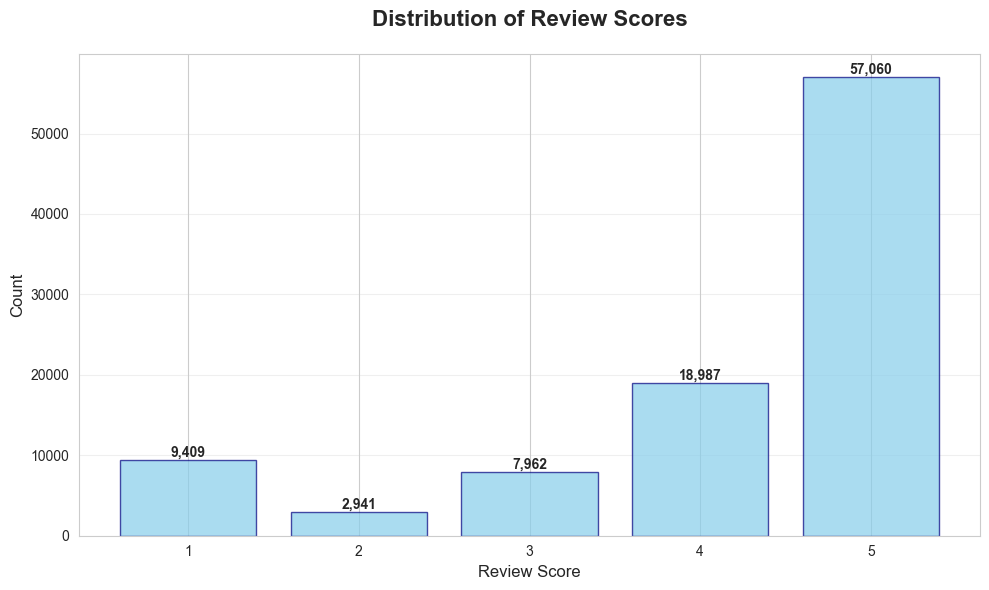

In [8]:
# 1. Distribution of Review Scores (if available)
if 'review_score' in df.columns:
    plt.figure(figsize=(10, 6))
    review_counts = df['review_score'].value_counts().sort_index()
    bars = plt.bar(review_counts.index, review_counts.values, 
                   color='skyblue', edgecolor='navy', alpha=0.7)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{int(height):,}',
                 ha='center', va='bottom', fontweight='bold')
    
    plt.title("Distribution of Review Scores", fontsize=16, fontweight='bold', pad=20)
    plt.xlabel("Review Score", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.savefig(os.path.join(figures_dir, "review_score_distribution.png"), 
                dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("⚠️ 'review_score' column not found - skipping review score visualization")

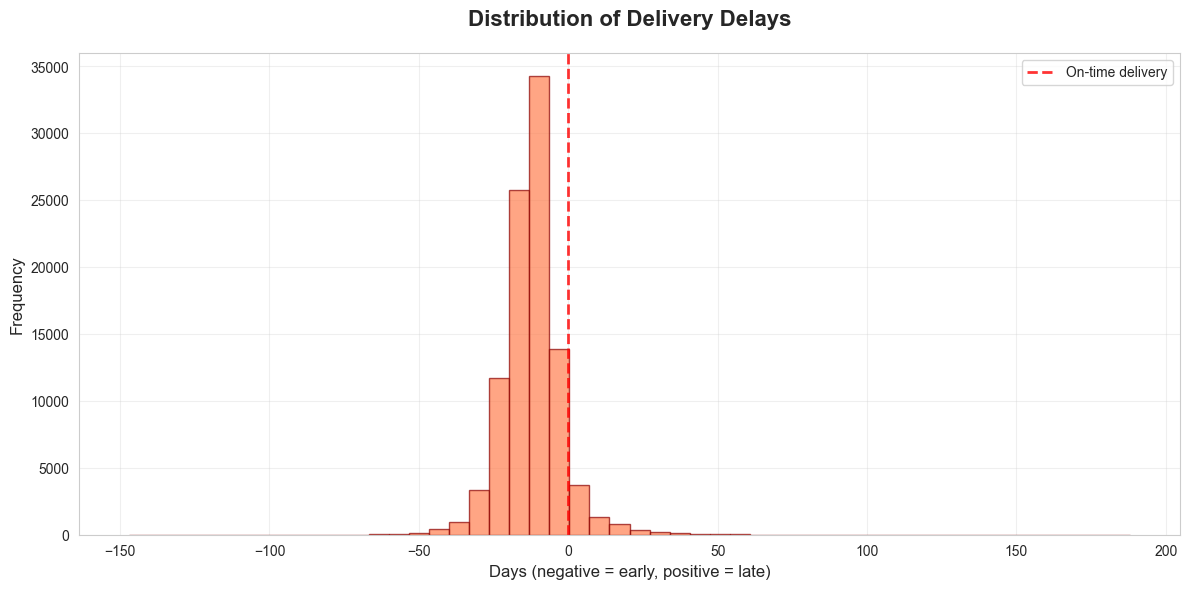

In [9]:
# 2. Distribution of Delivery Delays (if available)
if 'delivery_delay' in df.columns:
    plt.figure(figsize=(12, 6))
    delays_clean = df['delivery_delay'].dropna()
    plt.hist(delays_clean, bins=50, color='coral', alpha=0.7, edgecolor='darkred')
    plt.axvline(x=0, color='red', linestyle='--', linewidth=2, alpha=0.8, label='On-time delivery')
    plt.title("Distribution of Delivery Delays", fontsize=16, fontweight='bold', pad=20)
    plt.xlabel("Days (negative = early, positive = late)", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig(os.path.join(figures_dir, "delivery_delay_distribution.png"), 
                dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("⚠️ 'delivery_delay' column not found - skipping delivery delay visualization")

/var/folders/85/5gb0zbwn1rgfpwp6v912m9pw0000gn/T/ipykernel_45594/3415965232.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="review_score", y="delivery_delay", palette="Set2")


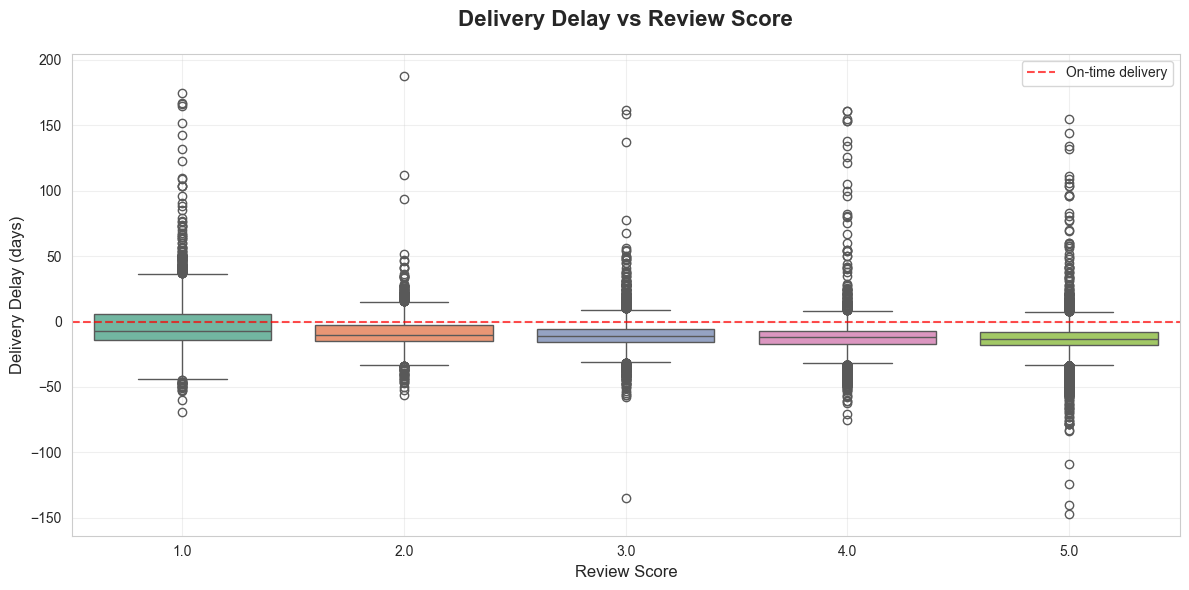

In [10]:
# 3. Delivery Delay vs Review Score (if both available)
if 'delivery_delay' in df.columns and 'review_score' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x="review_score", y="delivery_delay", palette="Set2")
    plt.axhline(y=0, color='red', linestyle='--', alpha=0.7, label='On-time delivery')
    plt.title("Delivery Delay vs Review Score", fontsize=16, fontweight='bold', pad=20)
    plt.xlabel("Review Score", fontsize=12)
    plt.ylabel("Delivery Delay (days)", fontsize=12)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig(os.path.join(figures_dir, "delay_vs_score.png"), 
                dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("⚠️ Both 'delivery_delay' and 'review_score' columns needed - skipping correlation plot")

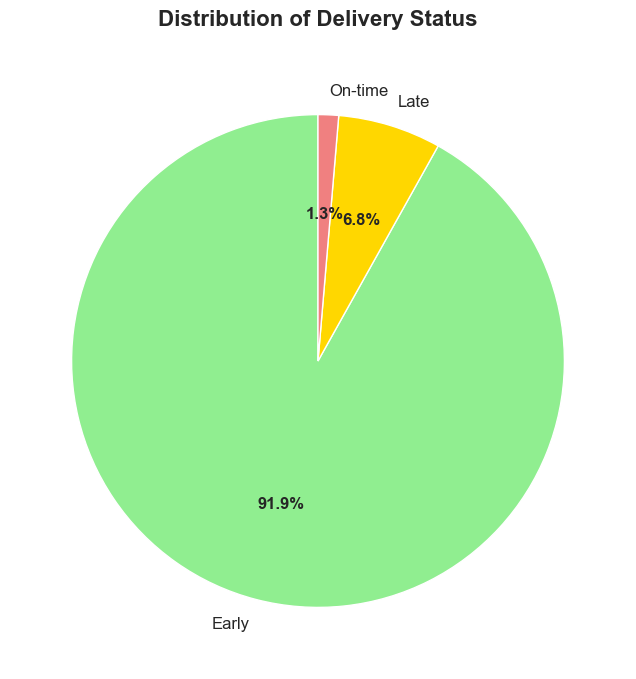

In [11]:
# 4. Delay Flag Distribution (if available)
if 'delay_flag' in df.columns:
    plt.figure(figsize=(10, 8))
    delay_counts = df['delay_flag'].value_counts()
    colors = ['lightgreen', 'gold', 'lightcoral']
    wedges, texts, autotexts = plt.pie(delay_counts.values, labels=delay_counts.index, 
                                       autopct='%1.1f%%', colors=colors, startangle=90,
                                       textprops={'fontsize': 12})
    
    # Make percentage text bold
    for autotext in autotexts:
        autotext.set_weight('bold')
    
    plt.title("Distribution of Delivery Status", fontsize=16, fontweight='bold', pad=20)
    plt.savefig(os.path.join(figures_dir, "delay_flag_distribution.png"), 
                dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("⚠️ 'delay_flag' column not found - skipping delay flag visualization")

In [12]:
# =============================================================================
# SUMMARY STATISTICS
# =============================================================================

print("\n" + "="*60)
print("SUMMARY STATISTICS")
print("="*60)

print(f"📊 Total records: {len(df):,}")

# Review score stats (if available)
if 'review_score' in df.columns:
    print(f"⭐ Average review score: {df['review_score'].mean():.2f}")
    print(f"\n📈 Review Score Breakdown:")
    review_summary = df['review_score'].value_counts().sort_index()
    for score, count in review_summary.items():
        percentage = (count / len(df)) * 100
        print(f"   Score {score}: {count:,} records ({percentage:.1f}%)")

# Delivery delay stats (if available)
if 'delivery_delay' in df.columns:
    print(f"⏰ Average delivery delay: {df['delivery_delay'].mean():.1f} days")

# Shipping time stats (if available)
if 'shipping_time' in df.columns:
    print(f"🚚 Average shipping time: {df['shipping_time'].mean():.1f} days")


SUMMARY STATISTICS
📊 Total records: 97,005
⭐ Average review score: 4.16

📈 Review Score Breakdown:
   Score 1.0: 9,409 records (9.7%)
   Score 2.0: 2,941 records (3.0%)
   Score 3.0: 7,962 records (8.2%)
   Score 4.0: 18,987 records (19.6%)
   Score 5.0: 57,060 records (58.8%)
⏰ Average delivery delay: -11.9 days
🚚 Average shipping time: 12.1 days


In [13]:
# Delay flag stats (if available)
if 'delay_flag' in df.columns:
    print(f"\n🚛 Delivery Status Breakdown:")
    delay_summary = df['delay_flag'].value_counts()
    for status, count in delay_summary.items():
        percentage = (count / len(df)) * 100
        print(f"   {status}: {count:,} records ({percentage:.1f}%)")

# Correlation (if both columns available)
if 'delivery_delay' in df.columns and 'review_score' in df.columns:
    correlation = df['delivery_delay'].corr(df['review_score'])
    print(f"\n🔗 Correlation between delivery delay and review score: {correlation:.3f}")

print("\n" + "="*60)
print("✅ DATA EXPLORATION COMPLETE!")
print("="*60)
print(f"📁 All figures saved to: {figures_dir}")
print(f"📈 Dataset analyzed: {df.shape[0]:,} records, {df.shape[1]} features")
print("\n🎯 Ready for Person 2 (hypothesis testing) and Person 3 (modeling/dashboard)!")


🚛 Delivery Status Breakdown:
   Early: 89,139 records (91.9%)
   Late: 6,563 records (6.8%)
   On-time: 1,303 records (1.3%)

🔗 Correlation between delivery delay and review score: -0.267

✅ DATA EXPLORATION COMPLETE!
📁 All figures saved to: /Users/aaronshrestha/Documents/HCAI5DS02_ChiNova_final_project/reports/figures
📈 Dataset analyzed: 97,005 records, 12 features

🎯 Ready for Person 2 (hypothesis testing) and Person 3 (modeling/dashboard)!
